In [17]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-5.624923771117068, -27.099568401815077),
 (19.07666739648093, 171.51944692643974),
 (-74.95895526528493, 14.078319185560275),
 (17.094143536687795, 62.05094052801948),
 (72.63997272931553, 153.5746112532912),
 (-3.1412542427969754, 35.42197586669624),
 (-32.34733861284219, -141.98269136469997),
 (-71.19776261014769, -179.22485469844005),
 (75.17659879170503, 98.08922737131468),
 (76.71626115145014, -32.087057393387425),
 (-0.9382179419697252, 28.99271274045475),
 (-5.1084594748992345, -156.8877641227222),
 (89.59672048107456, -77.81798933282423),
 (-7.993820514156184, -132.8288294307862),
 (-6.831989512638032, -162.43736710048017),
 (-5.3411673116612235, -93.63829654404597),
 (21.006344263811442, -162.3908044847746),
 (-16.72444522428988, -156.67311634800853),
 (-79.35671268377519, 16.470613795871515),
 (72.68314840299868, 155.83034337399118),
 (37.37456889935768, -117.2866799419086),
 (-43.66410523010565, 55.35460177427254),
 (86.44592339155278, -121.95346854463823),
 (-7.486794191

In [5]:
# Create a list for holding the cities.
cities=[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)



608

In [45]:
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):
      # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
      # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")








Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabedelo
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | sur
Processing Record 5 of Set 1 | srednekolymsk
Processing Record 6 of Set 1 | ngorongoro
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | khatanga
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | ntungamo
Processing Record 12 of Set 1 | faanui
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | samusu
City not found. Skipping...
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | vaitape
Processing Record 19 of Set 1 | pahrump
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | tuktoyaktu

Processing Record 35 of Set 4 | avarua
Processing Record 36 of Set 4 | cascais
Processing Record 37 of Set 4 | sitka
Processing Record 38 of Set 4 | kuche
City not found. Skipping...
Processing Record 39 of Set 4 | ratangarh
Processing Record 40 of Set 4 | duldurga
Processing Record 41 of Set 4 | wulanhaote
City not found. Skipping...
Processing Record 42 of Set 4 | saldanha
Processing Record 43 of Set 4 | san policarpo
Processing Record 44 of Set 4 | salalah
Processing Record 45 of Set 4 | boca do acre
Processing Record 46 of Set 4 | kasane
Processing Record 47 of Set 4 | zanjan
Processing Record 48 of Set 4 | kinshasa
Processing Record 49 of Set 4 | dhidhdhoo
Processing Record 50 of Set 4 | dunedin
Processing Record 1 of Set 5 | mendahara
City not found. Skipping...
Processing Record 2 of Set 5 | zhanaozen
Processing Record 3 of Set 5 | carnarvon
Processing Record 4 of Set 5 | walvis bay
Processing Record 5 of Set 5 | tasiilaq
Processing Record 6 of Set 5 | kupang
Processing Record 7

Processing Record 25 of Set 8 | dezhou
Processing Record 26 of Set 8 | port-gentil
Processing Record 27 of Set 8 | dwarka
Processing Record 28 of Set 8 | tecoanapa
Processing Record 29 of Set 8 | udachnyy
Processing Record 30 of Set 8 | lodja
Processing Record 31 of Set 8 | porohy
Processing Record 32 of Set 8 | cap malheureux
Processing Record 33 of Set 8 | nikolayevka
Processing Record 34 of Set 8 | vershino-shakhtaminskiy
Processing Record 35 of Set 8 | liverpool
Processing Record 36 of Set 8 | smidovich
Processing Record 37 of Set 8 | mutuipe
Processing Record 38 of Set 8 | lincoln
Processing Record 39 of Set 8 | doctor arroyo
Processing Record 40 of Set 8 | zhigansk
Processing Record 41 of Set 8 | arman
Processing Record 42 of Set 8 | tyulgan
Processing Record 43 of Set 8 | mareeba
Processing Record 44 of Set 8 | rupert
Processing Record 45 of Set 8 | great falls
Processing Record 46 of Set 8 | oriximina
Processing Record 47 of Set 8 | tucumcari
Processing Record 48 of Set 8 | do 

City not found. Skipping...
Processing Record 13 of Set 12 | golyshmanovo
Processing Record 14 of Set 12 | shirokiy
Processing Record 15 of Set 12 | ural
Processing Record 16 of Set 12 | indiaroba
Processing Record 17 of Set 12 | katsiveli
City not found. Skipping...
Processing Record 18 of Set 12 | makat
Processing Record 19 of Set 12 | sistranda
Processing Record 20 of Set 12 | sabang
Processing Record 21 of Set 12 | itambacuri
Processing Record 22 of Set 12 | cockburn town
Processing Record 23 of Set 12 | boende
Processing Record 24 of Set 12 | mogadishu
Processing Record 25 of Set 12 | tabas
Processing Record 26 of Set 12 | tulsipur
Processing Record 27 of Set 12 | namwala
Processing Record 28 of Set 12 | gondanglegi
Processing Record 29 of Set 12 | camargo
Processing Record 30 of Set 12 | severodvinsk
Processing Record 31 of Set 12 | sorrento
Processing Record 32 of Set 12 | ballina
Processing Record 33 of Set 12 | salinas
Processing Record 34 of Set 12 | esmeraldas
Processing Rec

In [46]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabedelo,-6.9811,-34.8339,88.47,68,100,8.57,BR,2022-05-19 14:15:33
1,Butaritari,3.0707,172.7902,81.55,70,6,12.73,KI,2022-05-19 14:15:33
2,Bredasdorp,-34.5322,20.0403,59.88,48,100,14.00,ZA,2022-05-19 14:15:33
3,Sur,22.5667,59.5289,96.91,35,0,3.56,OM,2022-05-19 14:15:34
4,Srednekolymsk,67.4500,153.6833,39.85,85,7,7.09,RU,2022-05-19 14:15:34
5,Ngorongoro,-3.2397,35.4875,65.34,42,100,7.94,TZ,2022-05-19 14:15:34
6,Rikitea,-23.1203,-134.9692,76.48,79,100,14.23,PF,2022-05-19 14:15:34
7,Vaini,-21.2000,-175.2000,73.56,83,40,5.75,TO,2022-05-19 14:15:34
8,Khatanga,71.9667,102.5000,29.97,90,100,12.46,RU,2022-05-19 14:14:19
9,Ntungamo,-0.8833,29.6500,77.56,65,100,2.13,UG,2022-05-19 14:15:35


In [47]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cabedelo,BR,2022-05-19 14:15:33,-6.9811,-34.8339,88.47,68,100,8.57
1,Butaritari,KI,2022-05-19 14:15:33,3.0707,172.7902,81.55,70,6,12.73
2,Bredasdorp,ZA,2022-05-19 14:15:33,-34.5322,20.0403,59.88,48,100,14.00
3,Sur,OM,2022-05-19 14:15:34,22.5667,59.5289,96.91,35,0,3.56
4,Srednekolymsk,RU,2022-05-19 14:15:34,67.4500,153.6833,39.85,85,7,7.09
...,...,...,...,...,...,...,...,...,...
551,Gerash,IR,2022-05-19 14:17:17,27.6652,54.1371,102.34,6,0,17.45
552,Ayan,RU,2022-05-19 14:17:17,56.4500,138.1667,32.72,91,11,7.49
553,Tessalit,ML,2022-05-19 14:17:17,20.1986,1.0114,105.64,5,16,19.55
554,Vestmannaeyjar,IS,2022-05-19 14:17:17,63.4427,-20.2734,49.19,93,75,24.16


In [48]:
#Create the outpute file
output_data_file="Weather_data/cities.csv"
#Export city data in csv
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [49]:
# Extract relevant fields from the DataFrame for plotting.
lat=city_data_df["Lat"]
MaxTemp=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
windspeed=city_data_df["Wind Speed"]

In [50]:
import time

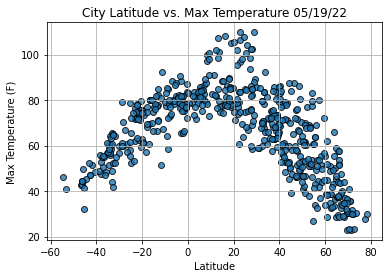

In [51]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lat, MaxTemp,edgecolor="black",linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

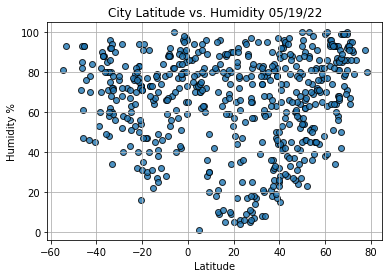

In [52]:
# Build the scatter plot for latitude vs. Humidity.

plt.scatter(lat, humidity,edgecolor="black",linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

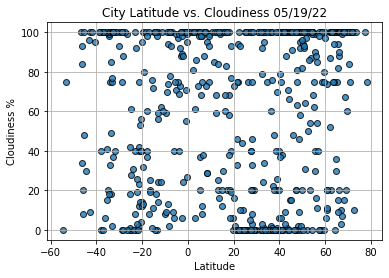

In [53]:
# Build the scatter plot for latitude vs. Cloudiness.

plt.scatter(lat, cloudiness,edgecolor="black",linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

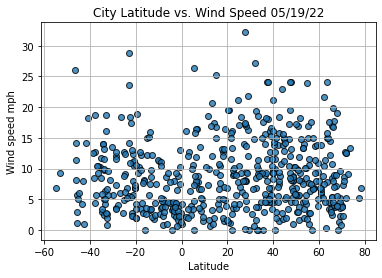

In [54]:
# Build the scatter plot for latitude vs. Wind Speed.

plt.scatter(lat, windspeed,edgecolor="black",linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind speed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [99]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title,fontsize=10)
    plt.show()
    print(f"The r-value is: {r_value:.3f}")

In [100]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0)]
sourthen_hemi_df=city_data_df.loc[(city_data_df["Lat"]<0)]

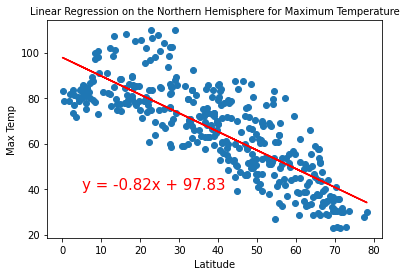

The r-value is: -0.804


In [101]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere for Maximum Temperature", 'Max Temp',(5,40))


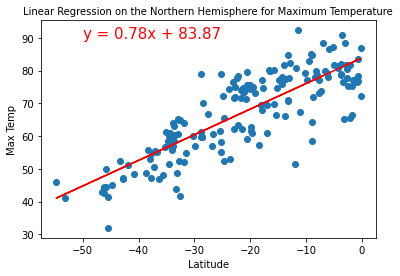

The r-value is: 0.830


In [102]:
# Linear regression on the Southern Hemisphere
x_values=sourthen_hemi_df["Lat"]
y_values=sourthen_hemi_df["Max Temp"]
#Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))


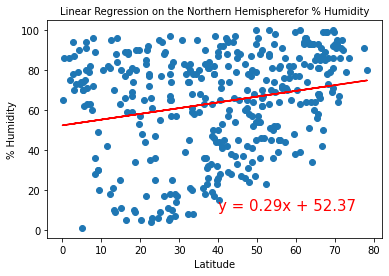

The r-value is: 0.221


In [103]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemispherefor % Humidity', '% Humidity',(40,10))

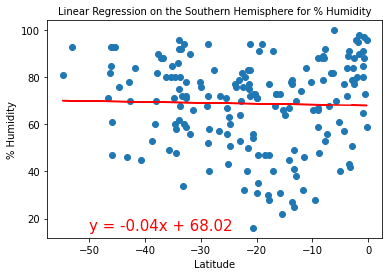

The r-value is: -0.027


In [104]:
# Linear regression on the Southern Hemisphere
x_values = sourthen_hemi_df["Lat"]
y_values = sourthen_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

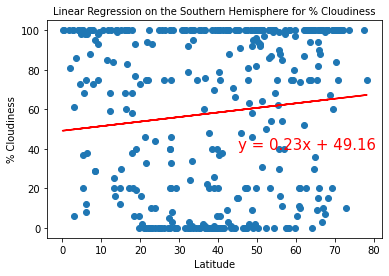

The r-value is: 0.110


In [105]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(45,40))

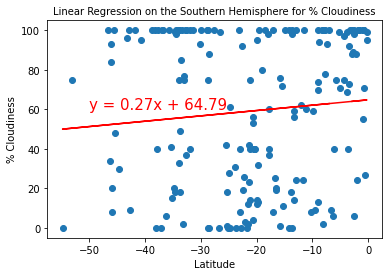

The r-value is: 0.095


In [106]:
# Linear regression on the Southern Hemisphere
x_values = sourthen_hemi_df["Lat"]
y_values = sourthen_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

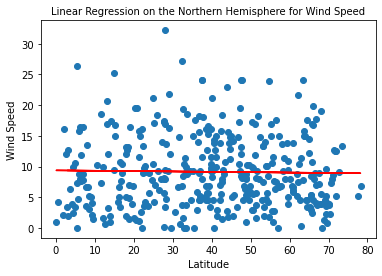

The r-value is: -0.020


In [109]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

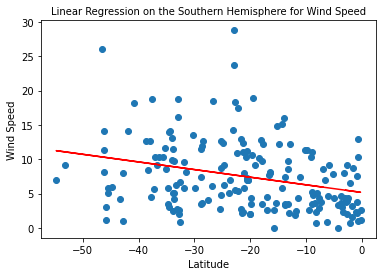

The r-value is: -0.292


In [111]:
# Linear regression on the Southern Hemisphere
x_values = sourthen_hemi_df["Lat"]
y_values = sourthen_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))